In [1]:
# Dependencies
#from config import (census_key, gkey)
import gmaps
import numpy as np
import pandas as pd
import requests
import time
#from us import states
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [2]:
#import baby name data
baby_name_original = pd.read_csv(
    "../Data/StateNames.csv", dtype="object", encoding="utf-8")
#display result
baby_name_original.head()

,Id,Name,Year,Gender,State,Count
0,1,Mary,1910,F,AK,14
1,2,Annie,1910,F,AK,12
2,3,Anna,1910,F,AK,10
3,4,Margaret,1910,F,AK,8
4,5,Helen,1910,F,AK,7


In [3]:
#clean up column formats for Count (float), Year (int), convert year to date in new column date_conv (datetime)
baby_name_original["Count"] = baby_name_original.Count.astype(float)
baby_name_original["Year"] = baby_name_original["Year"].astype(int)
baby_name_original['date_conv'] = pd.to_datetime(baby_name_original.Year)

In [4]:
#look for null values
baby_name_original.isnull().sum()

Id           0
Name         0
Year         0
Gender       0
State        0
Count        0
date_conv    0
dtype: int64

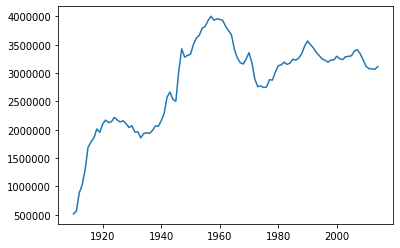

In [5]:
plt.plot(baby_name_original.groupby(['Year']).agg({'Count':np.sum}))

In [6]:
#add a new column for Decade
baby_name_new = baby_name_original.copy()
baby_name_new.set_index('Id', inplace=True)
#baby_name_new["Year"] = baby_name_new["Year"].astype(int)
baby_name_new['Decade'] = ((baby_name_new['Year']//10)*10)
#baby_name_new = baby_name_new.reset_index(drop=True)
baby_name_new

,Name,Year,Gender,State,Count,date_conv,Decade
Id,,,,,,,
1,Mary,1910,F,AK,14.0,1970-01-01 00:00:00.000001910,1910
2,Annie,1910,F,AK,12.0,1970-01-01 00:00:00.000001910,1910
3,Anna,1910,F,AK,10.0,1970-01-01 00:00:00.000001910,1910
4,Margaret,1910,F,AK,8.0,1970-01-01 00:00:00.000001910,1910
5,Helen,1910,F,AK,7.0,1970-01-01 00:00:00.000001910,1910
...,...,...,...,...,...,...,...
5647422,Seth,2014,M,WY,5.0,1970-01-01 00:00:00.000002014,2010
5647423,Spencer,2014,M,WY,5.0,1970-01-01 00:00:00.000002014,2010
5647424,Tyce,2014,M,WY,5.0,1970-01-01 00:00:00.000002014,2010


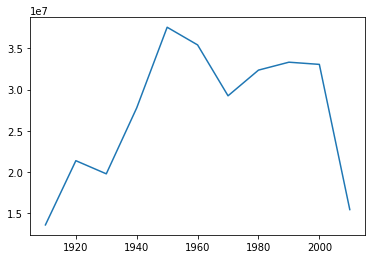

In [7]:
plt.plot(baby_name_new.groupby(['Decade']).agg({'Count':np.sum}))

In [8]:
GenderNameGB = baby_name_new.groupby(['Year', 'Gender'])['Count'].sum()
GenderNameGBDF = pd.DataFrame(GenderNameGB)
GenderNameGBDF

Count
Year Gender           
1910 F        352089.0
     M        164229.0
1911 F        372371.0
     M        193439.0
1912 F        504283.0
...                ...
2012 M       1651838.0
2013 F       1419351.0
     M       1647092.0
2014 F       1446259.0
     M       1667352.0

[210 rows x 1 columns]

In [21]:
GenderNameGBDF.rename(index={0: "Year", 1: "Gender", 2: "Count"})
GenderNameGBDFX = GenderNameGBDF.unstack()
GenderNameGBDFX.columns = GenderNameGBDFX.columns.droplevel()
GenderNameGBDFX


Gender,F,M
Year,,
1910,352089.0,164229.0
1911,372371.0,193439.0
1912,504283.0,383701.0
1913,566950.0,461603.0
1914,696886.0,596436.0
...,...,...
2010,1439346.0,1677202.0
2011,1422539.0,1656606.0
2012,1422020.0,1651838.0


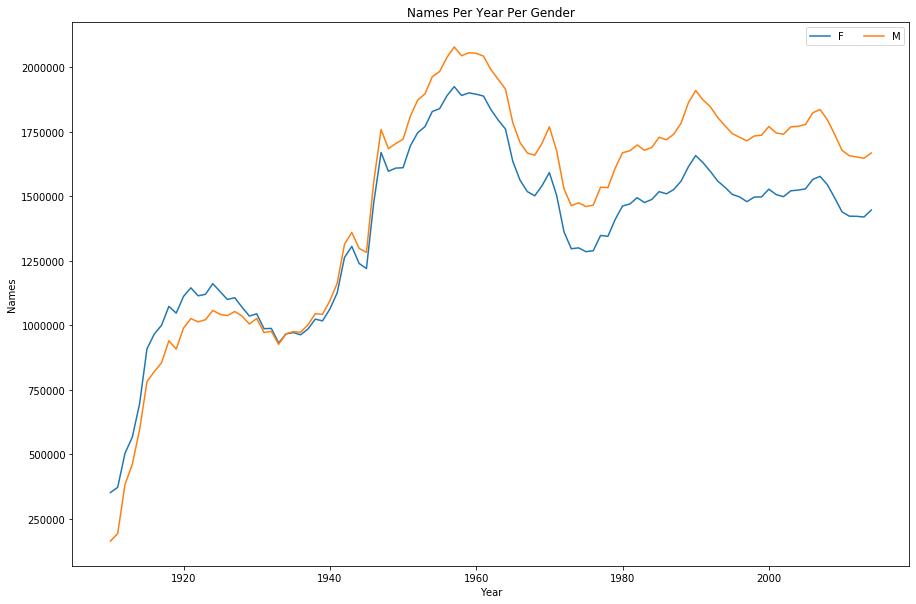

In [22]:
multi_plot = GenderNameGBDFX.plot(kind="line", figsize=(15, 10))
multi_plot.set_title("Names Per Year Per Gender")
multi_plot.set_xlabel('Year')
multi_plot.set_ylabel('Names')
multi_plot.legend(ncol=2)

In [10]:
baby_name_new

,Name,Year,Gender,State,Count,date_conv,Decade
Id,,,,,,,
1,Mary,1910,F,AK,14.0,1970-01-01 00:00:00.000001910,1910
2,Annie,1910,F,AK,12.0,1970-01-01 00:00:00.000001910,1910
3,Anna,1910,F,AK,10.0,1970-01-01 00:00:00.000001910,1910
4,Margaret,1910,F,AK,8.0,1970-01-01 00:00:00.000001910,1910
5,Helen,1910,F,AK,7.0,1970-01-01 00:00:00.000001910,1910
...,...,...,...,...,...,...,...
5647422,Seth,2014,M,WY,5.0,1970-01-01 00:00:00.000002014,2010
5647423,Spencer,2014,M,WY,5.0,1970-01-01 00:00:00.000002014,2010
5647424,Tyce,2014,M,WY,5.0,1970-01-01 00:00:00.000002014,2010


In [11]:
#Define Region by State values
Northeast = ('CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA')
Midwest = ('IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD')
South = ('DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'DC', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'AR', 'OK', 'TX')
West = ('AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA')


In [12]:
#add column Region and assign based on region-state values
baby_name_new["Region"] = np.where(baby_name_new["State"].isin(Northeast), "Northeast", 
         (np.where(baby_name_new["State"].isin(South), "South",
            (np.where(baby_name_new["State"].isin(West), "West",
                (np.where(baby_name_new["State"].isin(Midwest), "Midwest", "Unknown")))))))

#confirm 4 regions across all data
baby_name_new.nunique()

Name         30274
Year           105
Gender           2
State           51
Count         4944
date_conv      105
Decade          11
Region           4
dtype: int64

In [13]:
baby_name_new

,Name,Year,Gender,State,Count,date_conv,Decade,Region
Id,,,,,,,,
1,Mary,1910,F,AK,14.0,1970-01-01 00:00:00.000001910,1910,West
2,Annie,1910,F,AK,12.0,1970-01-01 00:00:00.000001910,1910,West
3,Anna,1910,F,AK,10.0,1970-01-01 00:00:00.000001910,1910,West
4,Margaret,1910,F,AK,8.0,1970-01-01 00:00:00.000001910,1910,West
5,Helen,1910,F,AK,7.0,1970-01-01 00:00:00.000001910,1910,West
...,...,...,...,...,...,...,...,...
5647422,Seth,2014,M,WY,5.0,1970-01-01 00:00:00.000002014,2010,West
5647423,Spencer,2014,M,WY,5.0,1970-01-01 00:00:00.000002014,2010,West
5647424,Tyce,2014,M,WY,5.0,1970-01-01 00:00:00.000002014,2010,West


In [14]:
#find any Unkown regions to bug fix Region States
baby_unknown = baby_name_new.loc[baby_name_new["Region"] == "Unknown", :]
baby_unknown

,Name,Year,Gender,State,Count,date_conv,Decade,Region
Id,,,,,,,,


In [28]:
y_names = baby_name_new.groupby(['Region']).agg({'Count':np.sum})
totalNames = baby_name_new['Count'].sum()
totalRegionNames = y_names['Count'].sum()
totalRegionNames

298883326.0

<BarContainer object of 4 artists>

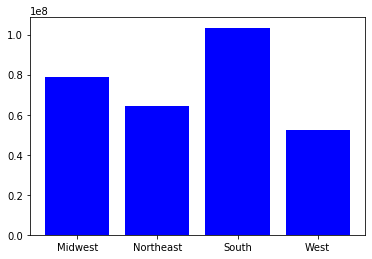

In [16]:
babyRegion = baby_name_new.groupby("Region")

Region = babyRegion.count().index
RegionNames = babyRegion['Count'].sum()

regionSummary = pd.DataFrame({"Region": Region, "Names": RegionNames,
                             })
regionSummary.set_index('Region', inplace=True)

#x_regions = baby_name_new["Region"].index
#y_names = baby_name_new.groupby(['Region']).agg({'Count':np.sum})
#x_axis = np.arange(len(x_regions))
plt.bar(Region, RegionNames, color="b", align="center")

In [17]:
regionSummary


,Names
Region,
Midwest,78987310.0
Northeast,64145418.0
South,103440090.0
West,52310508.0


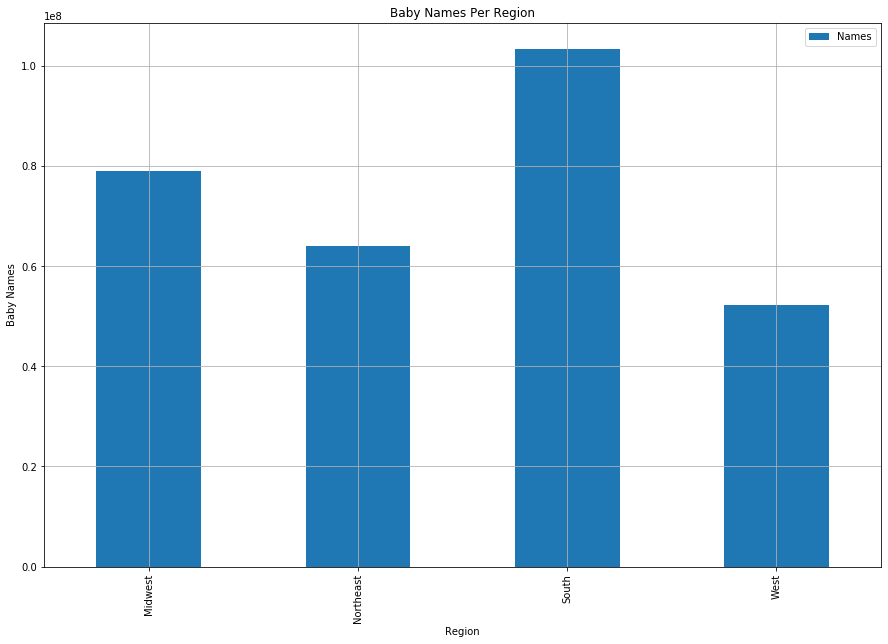

In [25]:
multi_plot = regionSummary.plot(kind="bar", figsize=(15, 10))
plt.title(f"Baby Names Per Region")
plt.grid()
plt.xlabel("Region")
plt.ylabel("Baby Names")
plt.savefig(f'../Output/Names Per Region.png')

In [19]:
#group by Name to find popular names
BabyNameGB = baby_name_original.groupby("Name")
BabyName = BabyNameGB.count().index
NameCount = BabyNameGB["Count"].sum()

TopNameGB = pd.DataFrame({"Name": BabyName, "Popularity": NameCount
                             })


In [20]:
#sort names by popularity
TopName = TopNameGB.sort_values(by=['Popularity'], ascending=False)
TopName.head()

,Name,Popularity
Name,,
James,James,4957166.0
John,John,4845414.0
Robert,Robert,4725713.0
Michael,Michael,4312975.0
William,William,3839236.0
